[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW8.ipynb)

**Prooblem 1:** Rent prices are of high interest to many people right now. Being able to predict rent well is important. Load in a data set of rental prices in India using the following command.

pd.read_csv("https://richardson.byu.edu/220/rent.csv")

The variables are, in order: BHK - number of bedrooms, Rent - rental fees, Size - square feet of space, AreaType - carpet or super, City, Furnished Status - furnished or unfurnished, Preferred - type of renter sought, Bathrooms, and Who to Contact.

Rent is the target variable. All other variables can be used as predictors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [3]:
rent = pd.read_csv("https://richardson.byu.edu/220/rent.csv")
rent.head()

,BHK,Rent,Size,AreaType,City,FurnishingStatus,Preferred,Bathroom,Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Part a. Determine what each variable is, numeric or categorical, and if they are categorical if they are binary or not.

 BHK - number of bedrooms: Numerical

 Rent - rental fees: Numerical

 Size - square feet of space: Numerical

 AreaType - carpet or super: Categorical (Binary)

 City: Categorical (non binary)

 Furnished Status - furnished or unfurnished Categorical (Binary)

 Preferred - type of renter sought: Categorical (non binary)

 Bathrooms: Numerical

 Who to Contact: Categorical (non binary)

Part b. Plot the target variable, Rent. Does it look skewed right or symmetric?

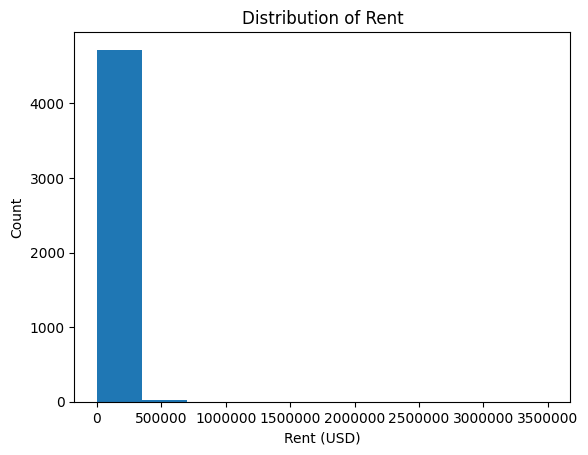

In [10]:
values = rent['Rent']
plt.hist(values)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Rent (USD)")
plt.ylabel("Count")
plt.title("Distribution of Rent")
plt.show()

The plot of rent values is right skewed.

Part c. Fit a regression model with rent as the target and the other variables as predictors.

In [5]:
formula = "Rent ~ BHK + Size + AreaType + City + FurnishingStatus + Preferred + Bathroom + Contact"

model = smf.ols(formula=formula, data=rent).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     156.7
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:03:28   Log-Likelihood:                -59261.
No. Observations:                4743   AIC:                         1.186e+05
Df Residuals:                    4728   BIC:                         1.186e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Part d. Plot the fitted values versus the residuals. Does it look like it could use a log transformation.

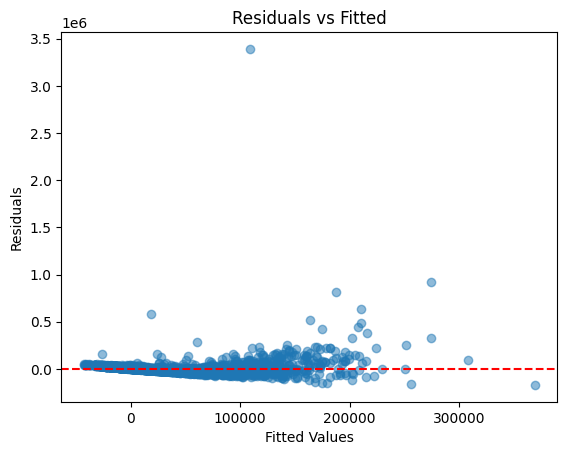

In [7]:
fitted = model.fittedvalues
residuals = model.resid

plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Rent LR")
plt.show()


Because the Residuals vs Fitted graph has a pattern (fan shaped) it would benefit from a log transform.

**Problem 2** Work with the log of rent.

Part a. Plot the log rent. Does it loook more or less symmetric?

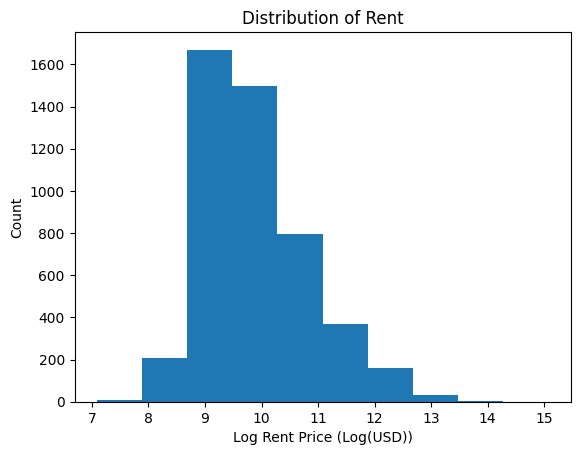

In [14]:
log_values = np.log(rent['Rent'])
plt.hist(log_values)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Log Rent Price (Log(USD))")
plt.ylabel("Count")
plt.title("Distribution of Rent")
plt.show()

Part b. Fit a regression model with log rent as the target and the other variables as predictors.

In [15]:
rent['log_Rent'] = np.log(rent['Rent'])

formula_log = "log_Rent ~ BHK + Size + AreaType + City + FurnishingStatus + Preferred + Bathroom + Contact"

model_log = smf.ols(formula=formula_log, data=rent).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:               log_Rent   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1464.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:15:03   Log-Likelihood:                -2448.8
No. Observations:                4743   AIC:                             4928.
Df Residuals:                    4728   BIC:                             5025.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Part c. Plot the fitted values versus residuals. Does this look any better?

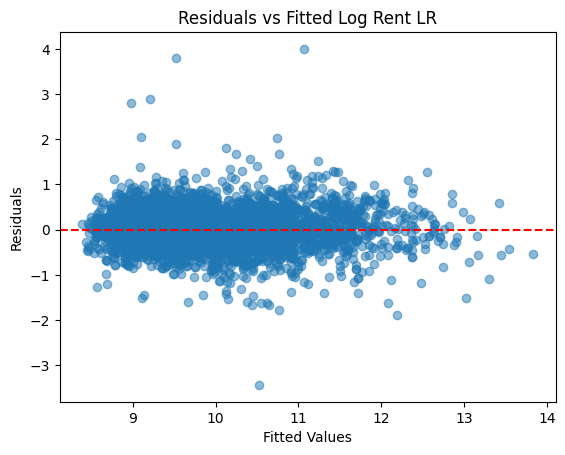

In [17]:
fitted = model_log.fittedvalues
residuals = model_log.resid

plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Log Rent LR")
plt.show()

Yes this model looks much better. There is the classic cloud formation centering around 0.

Part d. Use out of sample R^2 too determine which model is better.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

train, test = train_test_split(rent, test_size=0.2, random_state=42)

formula_rent = "Rent ~ BHK + Size + AreaType + City + FurnishingStatus + Preferred + Bathroom + Contact"
model_rent_train = smf.ols(formula=formula_rent, data=train).fit()
pred_rent = model_rent_train.predict(test)
r2_rent = r2_score(test["Rent"], pred_rent)

In [19]:
formula_log = "log_Rent ~ BHK + Size + AreaType + City + FurnishingStatus + Preferred + Bathroom + Contact"
model_log_train = smf.ols(formula=formula_log, data=train).fit()
pred_log = model_log_train.predict(test)
pred_log_back = np.exp(pred_log)
r2_log = r2_score(test["Rent"], pred_log_back)


In [20]:
print("Out-of-sample R^2 (Rent model):", r2_rent)
print("Out-of-sample R^2 (Log Rent model):", r2_log)


Out-of-sample R^2 (Rent model): 0.4542076088979894
Out-of-sample R^2 (Log Rent model): 0.6951019832164257


Because the Log Rent model has a significantly higher R^2 value we can assume that it is the better model.

**Problem 3** Check if predictors need a log transformation.

Part a. Fit another model where the predictor variable Size is given a log transformation as well as Rent.

In [21]:
rent['log_Size'] = np.log(rent['Size'])
formula_log_size = (
    "log_Rent ~ log_Size + BHK + AreaType + City + FurnishingStatus "
    "+ Preferred + Bathroom + Contact"
)

model_log_size = smf.ols(formula=formula_log_size, data=rent).fit()
print(model_log_size.summary())

                            OLS Regression Results                            
Dep. Variable:               log_Rent   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1342.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:23:17   Log-Likelihood:                -2614.2
No. Observations:                4743   AIC:                             5258.
Df Residuals:                    4728   BIC:                             5355.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Part b. Compare the p value Size in the model where Size is untransformed against the p value for log Size in the model with log Size. Is one or both significant.

Size p_value: 0

log(Size) p value: 0

Both are significant


Part c. Check out of sample R^2 in both models. Does taking the log of size improve the model?

In [28]:
train, test = train_test_split(rent, test_size=0.2, random_state=42)

modelA = smf.ols(formula_log, data=train).fit()
predA_log = modelA.predict(test)
predA_rent = np.exp(predA_log)
r2_A = r2_score(test["Rent"], predA_rent)

In [29]:
modelB = smf.ols(formula_log_size, data=train).fit()
predB_log = modelB.predict(test)
predB_rent = np.exp(predB_log)
r2_B = r2_score(test["Rent"], predB_rent)

In [30]:
print("Out-of-sample R^2 (Log-Rent with Size):", r2_A)
print("Out-of-sample R^2 (Log-Rent with log(Size)):", r2_B)

Out-of-sample R^2 (Log-Rent with Size): 0.6951019832164257
Out-of-sample R^2 (Log-Rent with log(Size)): 0.515686900077081


The R^2 value is significantly higer for log-rent and non-transformed size (not logged). Therefore the best of the two models is predicting log-rent with normal size data.

**Problem 4** Use the same Rent data to explore standardizing.

Part a. Use the data set with log Rent. Standardize the training data and fit a linear regression model.

In [32]:
train, test = train_test_split(rent, test_size=0.2, random_state=42)
num_cols = ["BHK", "Size", "Bathroom"]
means = train[num_cols].mean()
stds = train[num_cols].std()

train_std = train.copy()
test_std = test.copy()
train_std[num_cols] = (train[num_cols] - means) / stds
test_std[num_cols] = (test[num_cols] - means) / stds

In [33]:
model_std = smf.ols("log_Rent ~ BHK + Size + AreaType + City + FurnishingStatus + Preferred + Bathroom + Contact",
                    data=train_std).fit()

print(model_std.summary())

                            OLS Regression Results                            
Dep. Variable:               log_Rent   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1225.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:43:38   Log-Likelihood:                -1878.5
No. Observations:                3794   AIC:                             3787.
Df Residuals:                    3779   BIC:                             3881.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [34]:
model_std = smf.ols("log_Rent ~ BHK + Size + AreaType + City + FurnishingStatus + Preferred + Bathroom + Contact",
                    data=train).fit()

print(model_std.summary())

                            OLS Regression Results                            
Dep. Variable:               log_Rent   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1225.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:46:21   Log-Likelihood:                -1878.5
No. Observations:                3794   AIC:                             3787.
Df Residuals:                    3779   BIC:                             3881.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Part b. Check the p-values for the variables in this model against the model without standardization. Are there any differences?

There are no differences. The p values are the same across the board.

Part c. Use the standardization on the test set and make predictions for the model. Transform those predictions back to the original (log)scale.

In [37]:
pred_log_std = model_std.predict(test_std)
pred_rent_std = np.exp(pred_log_std)

pred_rent_std[:10]

,0
2574,12335.227973
3601,3651.820655
1957,4374.126814
429,2500.375376
465,2410.547287
2951,6842.998299
2784,3954.708199
1126,19430.365200
538,12048.860377
2304,2443.481198


**Problem 4**: The data set machine.csv can be loaded using the code

machine = pd.read_csv("https://richardson.byu.edu/220/machine.csv")

The target variable is the cost to maintain a certain type of energy production machinery. The predictors are weight of the machine, the attitude of the region the machine is located towards coal and oil refinery, the type of machine (front or back loading) and the industry the machine is in (coal or oil).

**Part a.** Build and tune a linear regression model to predict the target variable, Cost, using all the other variables besides car_name as predictors.  Tune the model so that only significant features remain.

In [38]:
machine = pd.read_csv("https://richardson.byu.edu/220/machine.csv")
machine.head()

,Cost,Weight,Attitude,Type,Industry
0,6.068,16.60,Negative,Front,Oil
1,4.602,20.37,Negative,Front,Oil
2,3.282,20.37,Negative,Front,Oil
3,2.192,20.37,Negative,Back,Oil
4,2.572,20.37,Negative,Back,Oil


In [40]:
formula_0 = "Cost ~ Weight + Attitude + Type + Industry"

model_full = smf.ols(formula=formula_0, data=machine).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     188.3
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.39e-78
Time:                        22:51:36   Log-Likelihood:                -871.71
No. Observations:                 289   AIC:                             1753.
Df Residuals:                     284   BIC:                             1772.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.1863 

All p values were 0 so all predictors are significant. No need to tune.

**Part b.** Plot the Cost of the machine against Weight. Distinguish the color of each. point based on the type of Industry. Repeat this to make plots for Cost against Weight with colors distinguished for attitude and machine type.

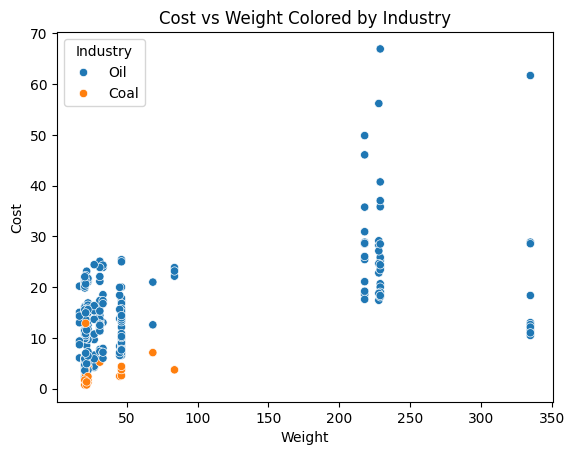

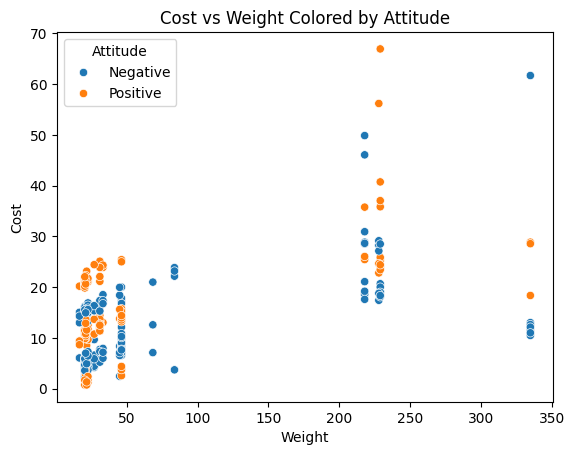

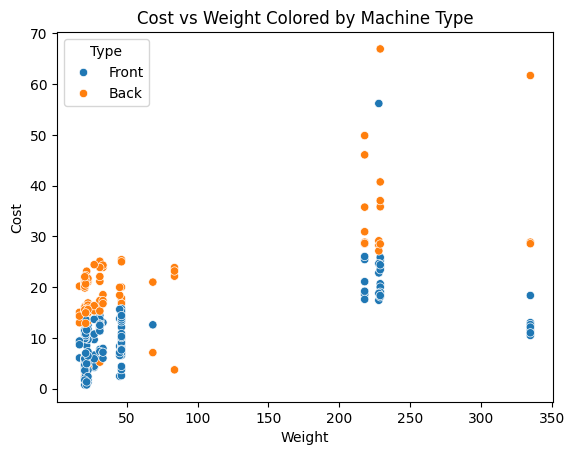

In [41]:
sns.scatterplot(data=machine, x="Weight", y="Cost", hue="Industry")
plt.title("Cost vs Weight Colored by Industry")
plt.show()

sns.scatterplot(data=machine, x="Weight", y="Cost", hue="Attitude")
plt.title("Cost vs Weight Colored by Attitude")
plt.show()

sns.scatterplot(data=machine, x="Weight", y="Cost", hue="Type")
plt.title("Cost vs Weight Colored by Machine Type")
plt.show()

**Part c.** Try building a model with only Weight, Industry, and an interaction between Wieght and Industry as predictors. Interpret the meaning of the coefficients in this case.

In [42]:
model_c = smf.ols("Cost ~ Weight * Industry", data=machine).fit()
print(model_c.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     57.55
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           4.10e-29
Time:                        22:55:17   Log-Likelihood:                -990.43
No. Observations:                 289   AIC:                             1989.
Df Residuals:                     285   BIC:                             2004.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

Intercept: The intercept has a coefficient of 4.5205 which means that when weight is 0 the average predicted cost of a machine will be 4.5205 for the baseline industry (Coal).

Industry[T.Oil]: The coefficient of this preditor is 6.2362 which means that the average predicted cost of a machine will be 6.2362 higher for a machine in the oil industry compared to the coal industry when all other predictors are held constant.

Weight: The coefficient of this predictor is .0055. This means that the average predicted cost of a machine will go up .0055 per every increase of weight by 1, assuming all other predicting variables are held constant.

Weight:Industry[T.Oil]: The coefficient of this is 0.0544. This means that the average slope of Weight increases by 0.0544 when the industry is changed from coal to oil.

It is important to note that in this case none of the coefficients have a p-value less than 0.05, so they should not be considered significant.

**Part d.** Plot the fitted regression lines for the model in Part c on top of the plot between Weight and Cost, with the data colored according to Industry.

**Problem 5.**

**Part a.** For the model created in Problem 4a, using all the variables in the model tuned to significant features, report the out of sample R^2 value.

**Part b**. Start with a model with all the predictors. Add in Weight^2 and interactions between weight and each other predictor. Tune the model to keep only significant features. Report the out of sample R^2 for this model.